In [28]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
iris = load_iris()
x=iris.data
y=iris.target

In [30]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [31]:
k_scores = []
for k in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


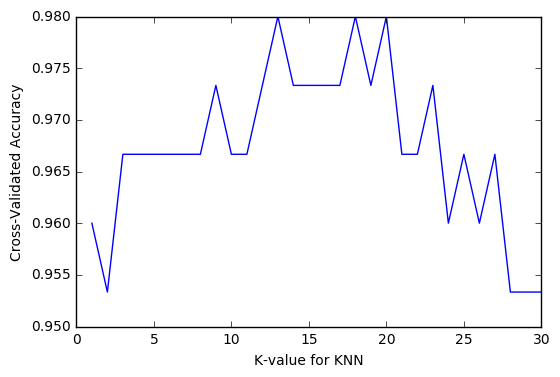

In [32]:
plt.plot(range(1,31),k_scores)
plt.xlabel('K-value for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [33]:
from sklearn.grid_search import GridSearchCV
k_range=range(1,31)
param_grid = dict(n_neighbors = k_range)
print(param_grid)
grid = GridSearchCV(knn,param_grid,cv=10,n_jobs=-1, scoring='accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [34]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [35]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [36]:
print(grid.grid_scores_[0].parameters,grid.grid_scores_[0].cv_validation_scores,grid.grid_scores_[0].mean_validation_score)

({'n_neighbors': 1}, array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.86666667,
        1.        ,  0.86666667,  1.        ,  1.        ,  1.        ]), 0.96)


In [37]:
mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [38]:
print(mean_scores.mean())

AttributeError: 'list' object has no attribute 'mean'

# Re-check above

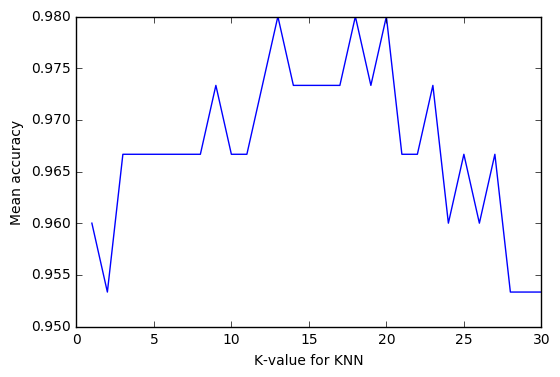

In [14]:
plt.plot(range(1,31), mean_scores)
plt.xlabel('K-value for KNN')
plt.ylabel('Mean accuracy')

In [15]:
print(grid.best_score_,grid.best_params_,grid.best_estimator_)
#Best estimator gives the model with the best parameters fit into it

(0.98, {'n_neighbors': 13}, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'))


## Multiple Parameters simultaneously

In [16]:
k_range = range(1,31)
weight_options = ['uniform', 'distance']

In [17]:
param_grid = dict(n_neighbors=k_range,weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=20, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [18]:
grid.grid_scores_

[mean: 0.96000, std: 0.08802, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.08802, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.94667, std: 0.09461, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.08802, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.06449, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.06449, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.06449, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.06449, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.97333, std: 0.05114, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.97333, std: 0.05114, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.97333, std: 0.05114, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.97333, std: 0.05114, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.05408, para

In [19]:
print(grid.best_score_, grid.best_params_)

(0.98, {'n_neighbors': 8, 'weights': 'uniform'})


In [21]:
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn.fit(x,y)
knn.predict([3,5,4,2])

/home/subhankar/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [22]:
grid.predict([3,5,4,2]) #GridSearchCV automatically fits the model with the best parameters before working on the test set

/home/subhankar/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [23]:
from sklearn.grid_search import RandomizedSearchCV

In [24]:
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy',n_iter=10, random_state=5)
rand.fit(x,y)
rand.grid_scores_
print(rand.best_score_)
print(rand.best_params_)

0.98
{'n_neighbors': 20, 'weights': 'uniform'}


In [27]:
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn,param_dist,n_jobs=-1,cv=10,scoring='accuracy',n_iter=10)
    rand.fit(x,y)
    best_scores.append(round(rand.best_score_,4))
print(best_scores)

[0.98, 0.98, 0.9733, 0.98, 0.98, 0.9733, 0.98, 0.98, 0.9733, 0.98, 0.98, 0.98, 0.98, 0.9733, 0.98, 0.98, 0.98, 0.9733, 0.98, 0.98]
